# Exámen M.L

 1-¿Qué es el sobreajuste?
    r. El sobreajuste es cuando un modelo se ha ajustado tan bien a un conjunto de datos, que al probar este 
    modelo en otro conjunto de datos, las predicciones o clasficaciones del modelo son malas.

# 2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score


#y=2x+1
i=5
co=pd.DataFrame({"x":[-1,0,3],"y":[-8,9,1]})
#c=['x':[-1,0,3],'y':[-3-i,4+i,6-i]]
print(co)
ao=co['x']
au=co['y']
yi=2*ao+1
print("nn")
print(yi)
mse = mean_squared_error(au,yi)
print("\tMean squared error: %.2f" % mse)
te=sum(yi-au)**2
print("\tTotal error: %.2f" % te)

x  y
0 -1 -8
1  0  9
2  3  1
nn
0   -1
1    1
2    7
Name: x, dtype: int64
	Mean squared error: 49.67
	Total error: 25.00


# 3

y=5x+b (3,7)

7=5*3+b


7-15=b

-8=b

# El mejor modelo es:  y=5x-8


# 4

In [7]:
a="hola"
print(type(a))

<class 'str'>


# 5

In [9]:
po=pd.DataFrame({"ML_Classification":["Unsupervised Learning","Supervised Learning"],"Application percentage in earth science":["40","60"]}, index=[1,2])
print(po)

ML_Classification Application percentage in earth science
1  Unsupervised Learning                                      40
2    Supervised Learning                                      60


# 6

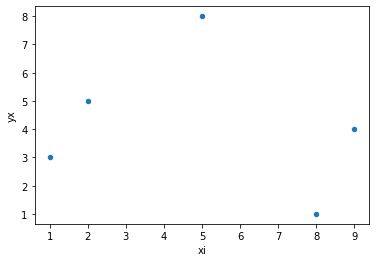

In [11]:
ins=pd.DataFrame({"xi":[1,5,8,2,9],"yx":[3,8,1,5,4]})
ins.plot.scatter(x='xi',y='yx')

# 7

In [13]:
url='https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/1WellPorPerm.csv'
pp=pd.read_csv(url)
pp.describe()


,Depth (m),Por (%),Perm (mD)
count,104.000000,104.000000,104.000000
mean,13.125000,12.291392,174.275774
std,7.541552,3.134241,83.046936
min,0.250000,1.683841,38.404238
25%,6.687500,10.837985,124.553622
50%,13.125000,12.342241,164.809769
75%,19.562500,14.329633,206.461192
max,26.000000,21.936304,560.420444


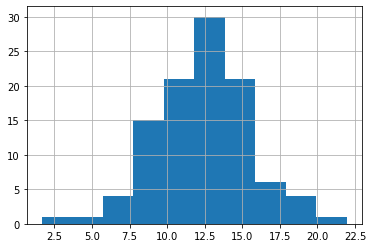

In [15]:
po=pp['Por (%)']
po.hist()

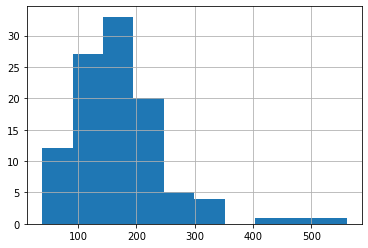

In [17]:
pe=pp['Perm (mD)']
pe.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B55134788>,
      dtype=object)

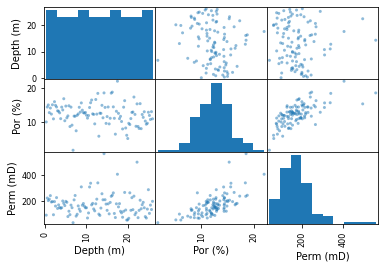

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(pp, alpha=0.5)

In [21]:
cara=['Por (%)','Perm (mD)']
co=pp[cara]
df = pd.DataFrame(co)
df.describe()
#array.reshape(-1, 1)

,Por (%),Perm (mD)
count,104.000000,104.000000
mean,12.291392,174.275774
std,3.134241,83.046936
min,1.683841,38.404238
25%,10.837985,124.553622
50%,12.342241,164.809769
75%,14.329633,206.461192
max,21.936304,560.420444


# Train and Test

In [23]:
from sklearn.model_selection import train_test_split
#features=['Por (%)','Perm (mD)']
#df1=df[features]
#xp = np.array()
xp =df[['Por (%)']] #Feature
yper =df[['Perm (mD)']]  #Label
xt, x_test, yt, y_test = train_test_split(xp, yper, test_size=0.2, random_state=42)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
    # Create linear regression object
model=LinearRegression().fit(xt,yt)
   # intercept & coefficients
print('Intercept: ', model.intercept_)
print('Coefficients: ', model.coef_)

yp=model.predict(x_test)
    #prueba
    #print(xts)
print('Metricas para el modelo con el conjunto de prueba')
    #print(xts)
    #print(yp)
mse = mean_squared_error(y_test,yp)
rmse = np.sqrt(mse)
print("\tMean squared error: %.2f" % mse)
print("\tRoot mean squared error: %.2f" % rmse)
    # Explained variance score: 1 is perfect prediction
print('\tR-squared score: %.2f' % r2_score(y_test,yp))
    #Entrenamiento
print('Metricas para el modelo con el conjunto de entrenamiento')
yp1=model.predict(xt)
mse = mean_squared_error(yt,yp1)
rmse = np.sqrt(mse)
print("\tMean squared error: %.2f" % mse)
print("\tRoot mean squared error: %.2f" % rmse)
    # Explained variance score: 1 is perfect prediction
print('\tR-squared score: %.2f' % r2_score(yt,yp1))

Intercept:  [-47.97106895]
Coefficients:  [[17.93246616]]
Metricas para el modelo con el conjunto de prueba
	Mean squared error: 4729.09
	Root mean squared error: 68.77
	R-squared score: 0.43
Metricas para el modelo con el conjunto de entrenamiento
	Mean squared error: 3444.03
	Root mean squared error: 58.69
	R-squared score: 0.47


# Decision Trees

In [26]:
from sklearn.tree import DecisionTreeRegressor
#Training
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(xt, yt) #Caracteristicas y Etiquetas
#Test
yp2=tree_reg.predict(x_test)
   
print('Metricas para el modelo con el conjunto de prueba')
  
mse2 = mean_squared_error(y_test,yp2)
rmse2 = np.sqrt(mse2)
print("\tMean squared error: %.2f" % mse2)
print("\tRoot mean squared error: %.2f" % rmse2)
    # Explained variance score: 1 is perfect prediction
print('\tR-squared score: %.2f' % r2_score(y_test,yp2))
    #Entrenamiento
print('Metricas para el modelo con el conjunto de entrenamiento')
yp12=tree_reg.predict(xt)
mse12 = mean_squared_error(yt,yp12)
rmse12 = np.sqrt(mse12)
print("\tMean squared error: %.2f" % mse12)
print("\tRoot mean squared error: %.2f" % rmse12)
    # Explained variance score: 1 is perfect prediction
print('\tR-squared score: %.2f' % r2_score(yt,yp12))

Metricas para el modelo con el conjunto de prueba
	Mean squared error: 11536.85
	Root mean squared error: 107.41
	R-squared score: -0.39
Metricas para el modelo con el conjunto de entrenamiento
	Mean squared error: 0.00
	Root mean squared error: 0.00
	R-squared score: 1.00


# Suppor Vector Regressor

In [27]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(xt, yt)
kp1= svm_reg.predict(x_test)
kap= svm_reg.predict(xt)
svm_mse = mean_squared_error(y_test, kp1)
svm_rmse = np.sqrt(svm_mse)
svm_rmse
print('Test set (Linear)')
print("\tMean squared error: %.2f" % svm_mse)
print("\tRoot mean squared error: %.2f" % svm_rmse)
print('\tR-squared score: %.2f' % r2_score(y_test, kp1))
print('Train set (Linear)')
print('\tR-squared score: %.2f' % r2_score(yt, kap))

svm_reg1 = SVR(kernel="rbf")
svm_reg1.fit(xt, yt)
kp11= svm_reg1.predict(xt)
kapo=svm_reg.predict(xt)
svm_mse1 = mean_squared_error(yt, kp11)
svm_rmse1 = np.sqrt(svm_mse1)
svm_rmse1
print('Test set (RBF)')
print("\tMean squared error: %.2f" % svm_mse1)
print("\tRoot mean squared error: %.2f" % svm_rmse1)
print('\tR-squared score: %.2f' % r2_score(y_test, kp1))
print('Train set (RBF)')
print('\tR-squared score: %.2f' % r2_score(yt, kapo))


Test set (Linear)
	Mean squared error: 5461.07
	Root mean squared error: 73.90
	R-squared score: 0.34
Train set (Linear)
	R-squared score: 0.39
Test set (RBF)
	Mean squared error: 3904.26
	Root mean squared error: 62.48
	R-squared score: 0.34
Train set (RBF)
	R-squared score: 0.39
